In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

## Variance and Standard Deviation ##

Let $X$ be a random variable and let $\mu_X = E(X)$. The *deviation from expected value*, informally called the deviation from average or just deviation for short, is defined as the difference

$$
D ~ = ~ X - \mu_X
$$

Thus $D$ is the amount by which $X$ exceeds its expectation $\mu_X$. Note that $D$ is negative when $X < \mu_X$.

The goal of this section is to quantify the rough size of $D$. One natural approach is to find $E(D)$, but that results in

$$
E(D) ~ = ~ E(X - \mu_X) ~ = ~ E(X) - \mu_X ~ = ~ 0
$$

No matter what the distribution of $X$, the expected deviation from average is 0: all the positive deviations exactly cancel out all the negative ones.

The expected deviation isn't a useful measure because it's 0 for every $X$. But it does help us understand what we have in mind when we say "rough size" of $D$: we mean the value of $D$ regardless of the sign. 

### Variance ###

We could measure the rough size of $D$ by $E(\vert D \vert)$, but expectations of absolute values don't have nice math properties. In particular, they don't work well with sums. But because of Pythagoras' Theorem, *squares* of distances do have good properties, especially with sums. so we will define a measure called the *variance* of $X$ by

$$
Var(X) ~ = ~ E(D^2) ~ = ~ E((X - \mu_X)^2)
$$

The variance of $X$ is non-negative because $D^2$ is a non-negative variable. Indeed, $Var(X)$ is strictly positive except if $X$ is just a constant.

Notice that variance is an expectation: it is the expectation of a non-linear function of $X$. To calculate it, we can apply our familiar method of finding expectations of non-linear functions.

### Standard Deviation ###

Calculating variance takes care of the problem of positive and negative deviations canceling out. But it introduces a different problem, which is that variance is the expected *squared* deviation and thus has different units from the original variable $X$. For example, if $X$ is a weight in pounds then $Var(X)$ is in squared pounds, and squared pounds aren't easy to undertand.

To fix this problem we take the square root of the variance. The resulting quantity has the same units as $X$ and is called the *standard deviation* or SD of $X$.

$$
SD(X) ~ = ~ \sqrt{Var(X)} ~ = ~ \sqrt{E((X - \mu_X)^2)}
$$

The standard deviation will be our main measure of the variability in a random variable. We will look carefully at its use and interpretation. But first, let's write the steps to calculate it.

Remember that the point of the SD is to measure the rough size of deviations around the expectation of $X$. So start by calculating the expectation.

- Find $\mu_X$.
- Find the deviation $D = X - \mu_X$.
- Square the deviation to get rid of the signs: $D^2 = (X - \mu_X)^2$.
- Find the mean squared deviation, also known as the variance: $Var(X) = E((X - \mu_X)^2)$.
- Take the square root of the variance to get the standard deviation: $SD(X) = \sqrt{Var(X)}$

If you go backwards along these steps you will see why the SD is called the *root mean square of deviations from average*.

### Example ###

Let $X$ have the distribution given below.

|$~~~~~~~~~~ x$| $3$ | $4$ | $5$ |
|-------------:|:---:|:---:|:---:|
|$P(X = x)$ | $0.35$ | $0.5$ | $0.15$ |

Then 

$$
E(X) ~ = ~ 3(0.35) + 4(0.5) + 5(0.15) ~ = ~ 3.8
$$

and is marked by a red arrow on the horizontal axis of the probability histogram below.

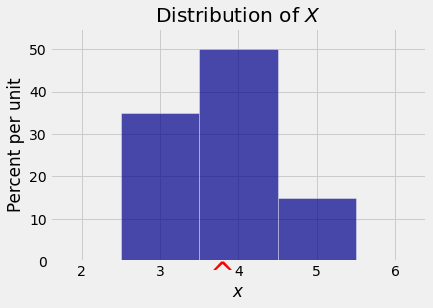

In [2]:
# NO CODE

x = make_array(3, 4, 5)
probs = make_array(0.35, 0.5, 0.15)
dist_X = Table().values(x).probabilities(probs)
Plot(dist_X, show_ev=True)
plt.title('Distribution of $X$')
plt.xlabel('$x$');

In [3]:
# NO CODE

variance_table = Table().with_columns(
    'x', dist_X.column(0),
    '(x - E(X))**2', (dist_X.column(0)-3.8)**2,
    'P(X = x)', dist_X.column(1)
)

The table below shows the distribution of $X$ along with the squared deviations:

In [4]:
variance_table

x,(x - E(X))**2,P(X = x)
3,0.64,0.35
4,0.04,0.5
5,1.44,0.15


We now have

$$
Var(X) ~ = ~ E((X - \mu_X)^2) ~ = ~ 0.64(0.35) + 0.04(0.5) + 1.44(0.15) ~ = ~ 0.46
$$

In [5]:
var_X = sum(variance_table.column(1) * variance_table.column(2))
var_X

0.45999999999999996

The standard deviation can now be calculated as

$$
SD(X) ~ = ~ \sqrt{Var(X)} ~ = ~ \sqrt{0.46} ~ \approx ~ 0.68 
$$

The points $E(X) \pm SD(X)$ are $3.8 - 0.68 = 3.12$ and $3.8 + 0.68 = 4.48$. These are the blue arrows in the figure below, shown to indicate the sense in which the SD measures the "rough size" of the deviations. We will have much more to say about interpretation in later sections.

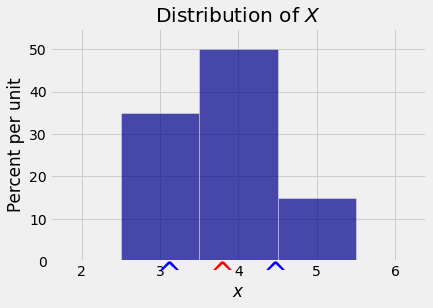

In [6]:
# NO CODE 

Plot(dist_X, show_ev=True, show_sd=True)
plt.title('Distribution of $X$')
plt.xlabel('$x$');

### Example 2: Larger Spread ###

The random variable $Y$ with the distribution given below has the same expectation as $X$ above. But its distribution looks quite different from that of $X$.

|$~~~~~~~~~~ y$| $3$ | $4$ | $5$ |
|-------------:|:---:|:---:|:---:|
|$P(Y = y)$ | $0.55$ | $0.1$ | $0.35$ |

$$
E(Y) ~ = ~ 3(0.55) + 4(0.1) + 5(0.35) ~ = ~ 3.8
$$


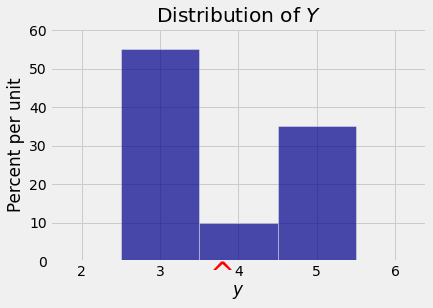

In [7]:
# NO CODE

y = make_array(3, 4, 5)
probs_Y = make_array(0.55, 0.1, 0.35)
dist_Y = Table().values(y).probabilities(probs_Y)
Plot(dist_Y, show_ev=True)
plt.title('Distribution of $Y$')
plt.xlabel('$y$');

The probabilities in the distribution of $Y$ are concentrated on the two outer values (3 and 5) whereas in the distribution of $X$ the most likely value is 4. Because both distributions have the same mean of 3.8, the deviations of $Y$ are more likely to be large than those of $X$. So $Y$ has the greater $SD$. 

You can check this numerically:

In [8]:
# NO CODE

variance_table_Y = Table().with_columns(
    'y', dist_Y.column(0),
    '(y - E(Y))**2', (dist_Y.column(0)-3.8)**2,
    'P(Y = y)', dist_Y.column(1)
)

In [9]:
variance_table_Y

y,(y - E(Y))**2,P(Y = y)
3,0.64,0.55
4,0.04,0.1
5,1.44,0.35


In [10]:
var_Y = sum(variance_table_Y.column(1) * variance_table_Y.column(2))
sd_Y = var_Y ** 0.5
sd_Y

0.9273618495495703

The figure below shows the probability histogram of $Y$ along with the three points $E(Y)$ and $E(Y) \pm SD(Y)$. Compare this with the corresponding figure for $X$ above. You will see that the two expectations are the same but $Y$ has the bigger SD.

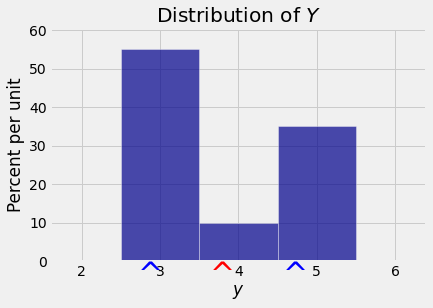

In [11]:
# NO CODE

Plot(dist_Y, show_ev=True, show_sd=True)
plt.title('Distribution of $Y$')
plt.xlabel('$y$');